In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 5.8 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('JW7_raw.csv')
df

,Position,Date,Team,Inning,Batter,Batter_hand,Bounds,Start_area,Catch_area,Catch_pos,...,Throw_area,Throw_to,Throw_time,Throw_direction,Throw_pos,Catch_success,Throw_success,Situation,Note_1,Note_2
0,유격수,2023.4.1,삼성,3,피렐라,우,2,3유간흙,3유간흙,무릎,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
1,유격수,2023.4.1,삼성,7,피렐라,우,2,3유간흙,3유간흙,허리,...,3유간흙,2루,0.95,정면,가슴,성공,성공,병살타,NaN,NaN
2,유격수,2023.4.1,삼성,8,김태군,우,0,유격수정면,2루베이스앞,가슴,...,2루베이스앞,1루,0.50,정면,가슴,성공,성공,병살타,NaN,NaN
3,유격수,2023.4.1,삼성,1,구자욱,좌,2,유격수정면,유격수정면,가슴,...,유격수정면,1루,0.60,왼쪽,얼굴,성공,성공,땅볼,NaN,NaN
4,유격수,2023.4.1,삼성,3,강한울,우,0,유격수정면,2루베이스앞,허리,...,NaN,NaN,NaN,NaN,NaN,성공,NaN,땅볼,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,유격수,2023.11.3,KT,6,김상수,우,4,3유간흙,유격수정면,발목,...,유격수정면,1루,0.66,오른쪽,얼굴,성공,성공,땅볼,언더스로,NaN
584,유격수,2023.11.3,KT,3,NaN,NaN,0,유격수정면,2루베이스앞,무릎,...,NaN,NaN,NaN,NaN,NaN,성공,NaN,도루저지,NaN,NaN
585,유격수,2023.11.3,KT,2,오윤석,우,4,유격수정면,3유간흙,발목,...,3유간흙,1루,0.85,정면,발목,성공,성공,내야안타,다이빙캐치,NaN
586,유격수,2023.11.5,KT,6,박병호,우,0,유격수정면,2루베이스앞,가슴,...,2루베이스앞,1루,0.75,정면,얼굴,성공,성공,병살타,언더스로,NaN


In [ ]:
# 데이터프레임 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position         588 non-null    object 
 1   Date             588 non-null    object 
 2   Team             588 non-null    object 
 3   Inning           588 non-null    int64  
 4   Batter           541 non-null    object 
 5   Batter_hand      541 non-null    object 
 6   Bounds           588 non-null    int64  
 7   Start_area       588 non-null    object 
 8   Catch_area       588 non-null    object 
 9   Catch_pos        588 non-null    object 
 10  Backhand         588 non-null    object 
 11  Throw_area       395 non-null    object 
 12  Throw_to         395 non-null    object 
 13  Throw_time       395 non-null    float64
 14  Throw_direction  395 non-null    object 
 15  Throw_pos        395 non-null    object 
 16  Catch_success    588 non-null    object 
 17  Throw_success   

In [ ]:
# 결측치 확인
df.isnull().sum()

Position             0
Date                 0
Team                 0
Inning               0
Batter              47
Batter_hand         47
Bounds               0
Start_area           0
Catch_area           0
Catch_pos            0
Backhand             0
Throw_area         193
Throw_to           193
Throw_time         193
Throw_direction    193
Throw_pos          193
Catch_success        0
Throw_success      193
Situation            0
Note_1             317
Note_2             539
dtype: int64

In [ ]:
# 수치형, 명목형 컬럼별 시각화
cols_obj = df.select_dtypes(include="object").columns
cols_num = df.select_dtypes(include="number").columns
print(cols_obj)
print(cols_num)

Index(['Position', 'Date', 'Team', 'Batter', 'Batter_hand', 'Start_area',
       'Catch_area', 'Catch_pos', 'Backhand', 'Throw_area', 'Throw_to',
       'Throw_direction', 'Throw_pos', 'Catch_success', 'Throw_success',
       'Situation', 'Note_1', 'Note_2'],
      dtype='object')
Index(['Inning', 'Bounds', 'Throw_time'], dtype='object')


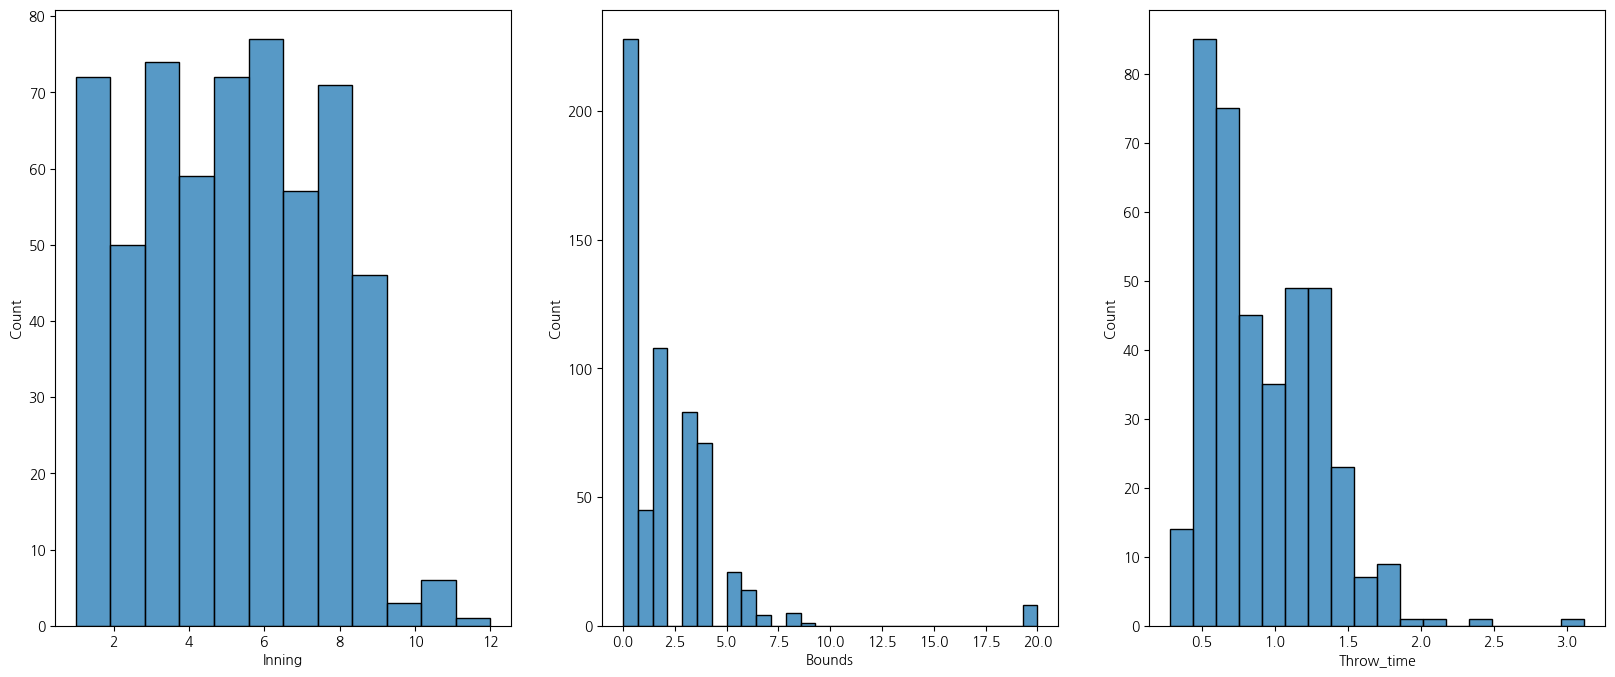

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

for i, col_name in enumerate(cols_num):
  sns.histplot(data=df, x=col_name, ax=axes[i])

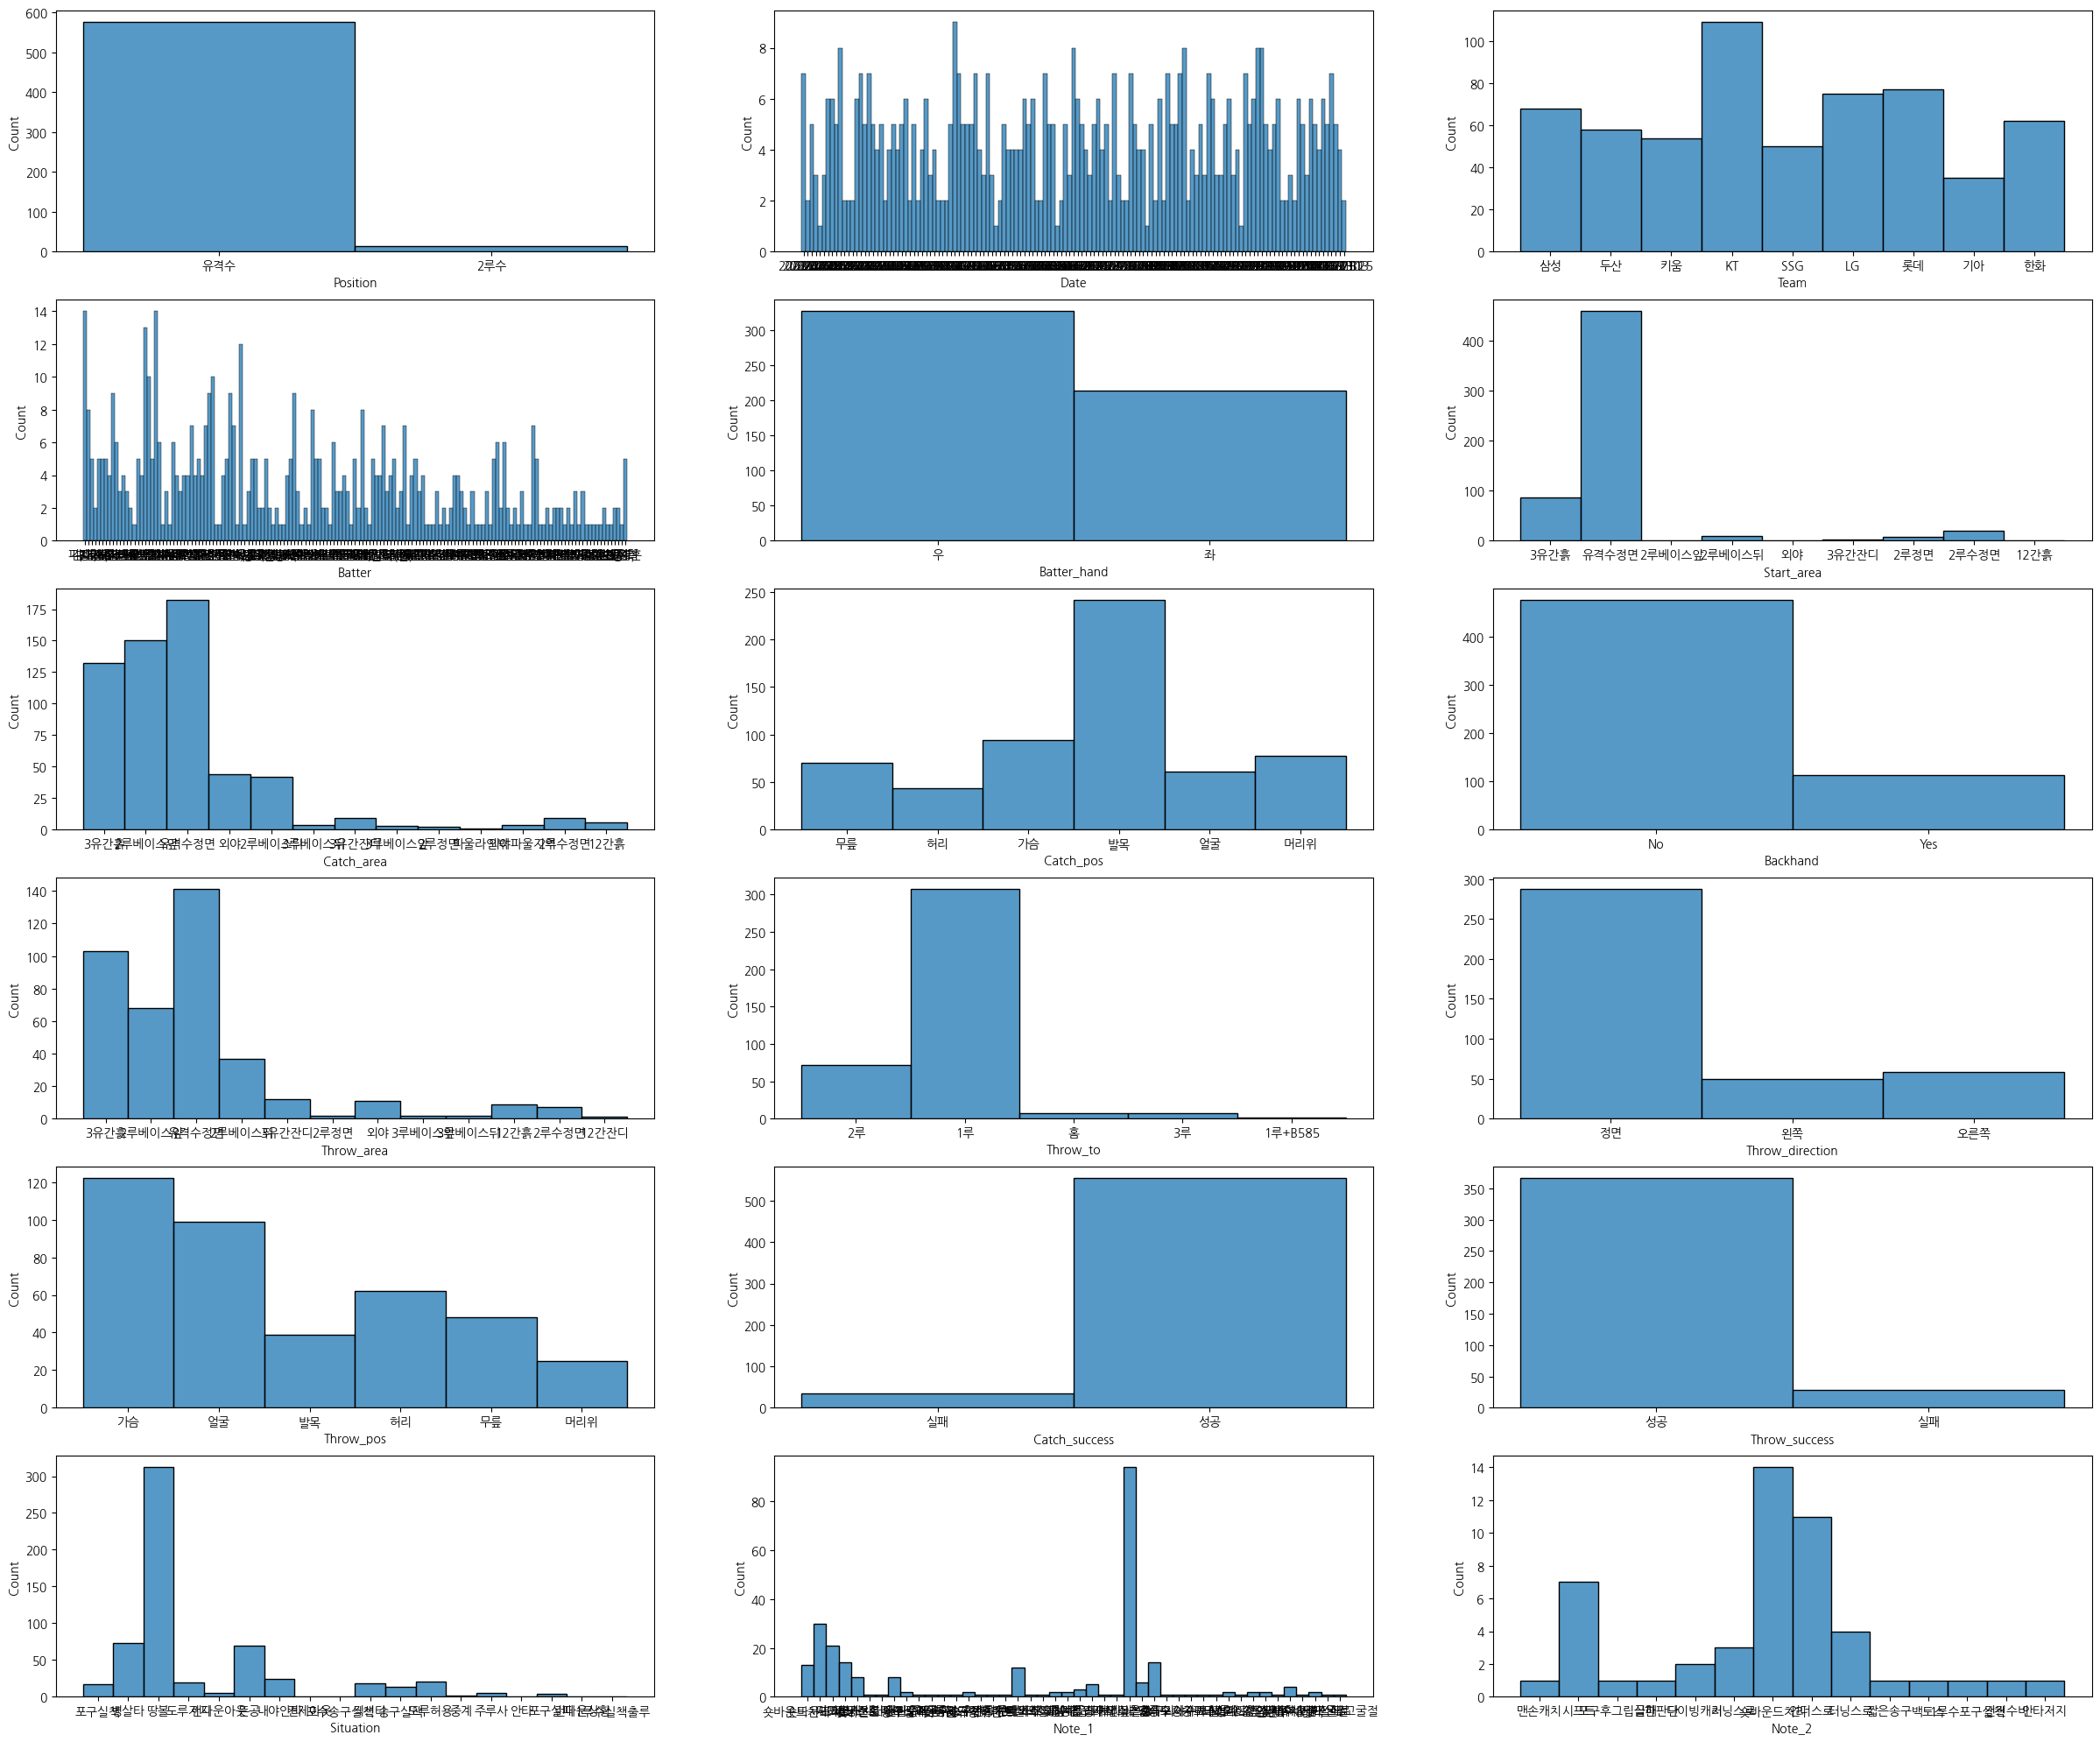

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(30, 25))

for i, col_name in enumerate(cols_obj):
  row = i // 3
  col = i % 3
  sns.histplot(data=df, x=col_name, ax=axes[row][col])

In [ ]:
# 송구/포구 실패 데이터셋
df_tf = df[df['Throw_success']=='실패']
df_cf = df[df['Catch_success']=='실패']
df_cf.shape, df_tf.shape

((34, 21), (29, 21))

## 포구 미스 분석

### 상대팀별

<Axes: xlabel='Team', ylabel='count'>

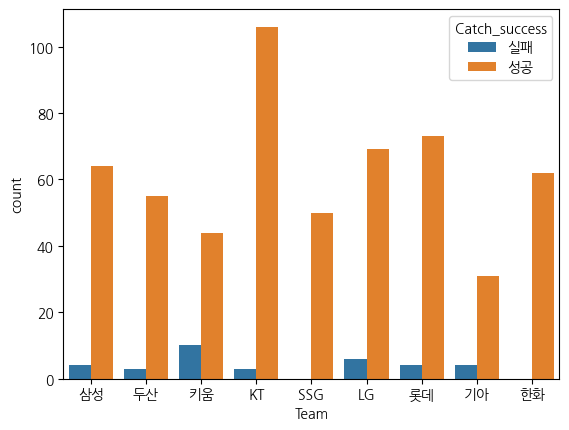

In [ ]:
sns.countplot(x=df['Team'], hue=df['Catch_success'])

실패/성공 비율이 월등히 높은 키움 상대 수비와 기아 상대 수비 + 절대적 수치가 높은 LG전 수비


In [ ]:
cf_byteam = df_cf.groupby(["Team"])["Catch_success"].count()
cf_byteam

Team
KT     3
LG     6
기아     4
두산     3
롯데     4
삼성     4
키움    10
Name: Catch_success, dtype: int64

절대 수치로는 LG와 키움이 높다

In [ ]:
df_catchcount = df.groupby(["Team"])["Throw_success"].count()
cf_byteam / df_catchcount * 100

Team
KT      3.846154
LG     13.333333
SSG          NaN
기아     20.000000
두산      8.108108
롯데      7.407407
삼성      9.090909
키움     25.641026
한화           NaN
dtype: float64

각 팀 상대별 포구 실패/총 포구 비율은 키움과 기아가 매우 높다

In [ ]:
df_cf[df_cf['Team']=='키움']

,Position,Date,Team,Inning,Batter,Batter_hand,Bounds,Start_area,Catch_area,Catch_pos,...,Throw_area,Throw_to,Throw_time,Throw_direction,Throw_pos,Catch_success,Throw_success,Situation,Note_1,Note_2
21,유격수,2023.4.8,키움,5,러셀,우,3,3유간흙,2루베이스앞,발목,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,송구전환미스,NaN
130,유격수,2023.5.12,키움,6,김동헌,우,0,유격수정면,2루베이스앞,머리위,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,주자와부딪침,NaN
132,유격수,2023.5.12,키움,2,김동헌,우,1,유격수정면,3유간흙,발목,...,3유간흙,2루,0.45,오른쪽,가슴,실패,성공,땅볼,고의낙구,NaN
142,유격수,2023.5.14,키움,2,NaN,NaN,0,2루베이스뒤,2루베이스앞,얼굴,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,도루허용,포수송구미스,NaN
300,유격수,2023.7.4,키움,5,이정후,좌,0,2루수정면,2루수정면,머리위,...,2루베이스뒤,홈,0.75,왼쪽,가슴,실패,실패,내야안타,강습타구,NaN
303,유격수,2023.7.5,키움,7,이형종,우,3,유격수정면,유격수정면,무릎,...,유격수정면,1루,1.75,정면,얼굴,실패,성공,땅볼,NaN,NaN
369,유격수,2023.8.4,키움,4,김동헌,우,3,유격수정면,외야,무릎,...,외야,1루,0.55,정면,무릎,실패,실패,내야안타,숏바운드처리미스,짧은송구
461,유격수,2023.9.5,키움,9,김휘집,우,3,유격수정면,유격수정면,발목,...,유격수정면,2루,0.41,정면,머리위,실패,성공,땅볼,고의낙구,NaN
462,유격수,2023.9.6,키움,3,박찬혁,우,4,유격수정면,2루베이스뒤,발목,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
463,유격수,2023.9.6,키움,4,송성문,좌,1,2루수정면,2루수정면,무릎,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,시프트


In [ ]:
df_cf[df_cf['Team']=='기아']

,Position,Date,Team,Inning,Batter,Batter_hand,Bounds,Start_area,Catch_area,Catch_pos,...,Throw_area,Throw_to,Throw_time,Throw_direction,Throw_pos,Catch_success,Throw_success,Situation,Note_1,Note_2
244,유격수,2023.6.16,기아,2,최원준,좌,4,유격수정면,3유간흙,발목,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
337,유격수,2023.7.25,기아,4,김태군,우,2,유격수정면,유격수정면,무릎,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
442,유격수,2023.8.31,기아,6,김선빈,좌,0,유격수정면,유격수정면,허리,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실패,다이빙캐치,NaN
536,유격수,2023.10.16,기아,1,김도영,우,2,유격수정면,유격수정면,무릎,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN


In [ ]:
df_cf[df_cf['Team']=='LG']

,Position,Date,Team,Inning,Batter,Batter_hand,Bounds,Start_area,Catch_area,Catch_pos,...,Throw_area,Throw_to,Throw_time,Throw_direction,Throw_pos,Catch_success,Throw_success,Situation,Note_1,Note_2
52,유격수,2023.4.18,LG,6,문보경,좌,2,유격수정면,유격수정면,발목,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,NaN,NaN
58,유격수,2023.4.19,LG,5,NaN,NaN,1,유격수정면,2루베이스앞,발목,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포수송구실책,숏바운드처리미스,NaN
117,유격수,2023.5.3,LG,5,문성주,좌,0,유격수정면,외야,머리위,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,뜬공처리미스,NaN
254,유격수,2023.6.21,LG,4,문보경,좌,4,유격수정면,유격수정면,무릎,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
429,유격수,2023.8.26,LG,8,문보경,좌,2,유격수정면,유격수정면,허리,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,강습타구,NaN
516,유격수,2023.9.22,LG,5,김현수,좌,4,3유간흙,3유간흙,발목,...,3유간흙,1루,0.47,정면,가슴,실패,성공,땅볼,단번에포구실패,NaN


세 팀 경우 모두 숏바운드가 자주 보인다. 특히 숏바운드처리미스의 경우 총 13번 중 8번을 이 세 팀을 상대로 기록했고, 또 그중 5번을 홈에서 기록했다. 홈 숏바운드 처리 발전 필요

In [ ]:
df_cf['Note_1'].value_counts()

숏바운드처리미스    13
고의낙구         2
투수송구미스       2
강습타구         2
송구전환미스       1
불규칙바운드       1
뜬공처리미스       1
주자와부딪침       1
포수송구미스       1
바운드처리미스      1
송구미스추가       1
2루수송구미스      1
포구실패         1
다이빙캐치        1
단번에포구실패      1
베이스맞고굴절      1
Name: Note_1, dtype: int64

### 숏바운드처리미스 관련 분석

In [ ]:
df_shortbound = df_cf[df_cf['Note_1'] == '숏바운드처리미스']
df_shortbound

,Position,Date,Team,Inning,Batter,Batter_hand,Bounds,Start_area,Catch_area,Catch_pos,...,Throw_area,Throw_to,Throw_time,Throw_direction,Throw_pos,Catch_success,Throw_success,Situation,Note_1,Note_2
0,유격수,2023.4.1,삼성,3,피렐라,우,2,3유간흙,3유간흙,무릎,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
38,유격수,2023.4.13,KT,8,김상수,우,1,외야,외야,발목,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
58,유격수,2023.4.19,LG,5,NaN,NaN,1,유격수정면,2루베이스앞,발목,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포수송구실책,숏바운드처리미스,NaN
174,유격수,2023.5.24,롯데,1,윤동희,우,2,유격수정면,3유간흙,무릎,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,내야안타,숏바운드처리미스,NaN
243,유격수,2023.6.15,두산,4,김재환,좌,3,유격수정면,3유간흙,발목,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,내야안타,숏바운드처리미스,NaN
244,유격수,2023.6.16,기아,2,최원준,좌,4,유격수정면,3유간흙,발목,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
254,유격수,2023.6.21,LG,4,문보경,좌,4,유격수정면,유격수정면,무릎,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
337,유격수,2023.7.25,기아,4,김태군,우,2,유격수정면,유격수정면,무릎,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
369,유격수,2023.8.4,키움,4,김동헌,우,3,유격수정면,외야,무릎,...,외야,1루,0.55,정면,무릎,실패,실패,내야안타,숏바운드처리미스,짧은송구
462,유격수,2023.9.6,키움,3,박찬혁,우,4,유격수정면,2루베이스뒤,발목,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN


df_cf의 데이터 수는 총 34개다. 그런데 그 중 13개가 숏바운드 처리미스다. 이는 실제로 숏바운드 처리가 정말 중요한 점을 의미한다. 숏바운드 처리만 줄여도 포구실패의 3분의 1이상을 줄일 수 있다.

In [ ]:
df_shortbound['Catch_pos'].value_counts()

무릎    8
발목    5
Name: Catch_pos, dtype: int64

### 백핸드

<Axes: xlabel='Backhand', ylabel='count'>

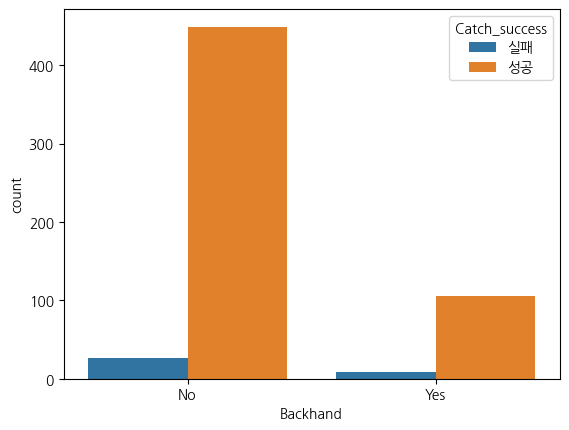

In [ ]:
sns.countplot(x=df['Backhand'], hue=df['Catch_success'])

In [ ]:
df_cf['Backhand'].value_counts() / df['Backhand'].value_counts() * 100

No     5.473684
Yes    7.079646
Name: Backhand, dtype: float64

백핸드의 여부는 yes가 더 높게 나오긴 했지만, 큰 차이를 보이진 않는 것 같다.

### 출발-포구 위치별

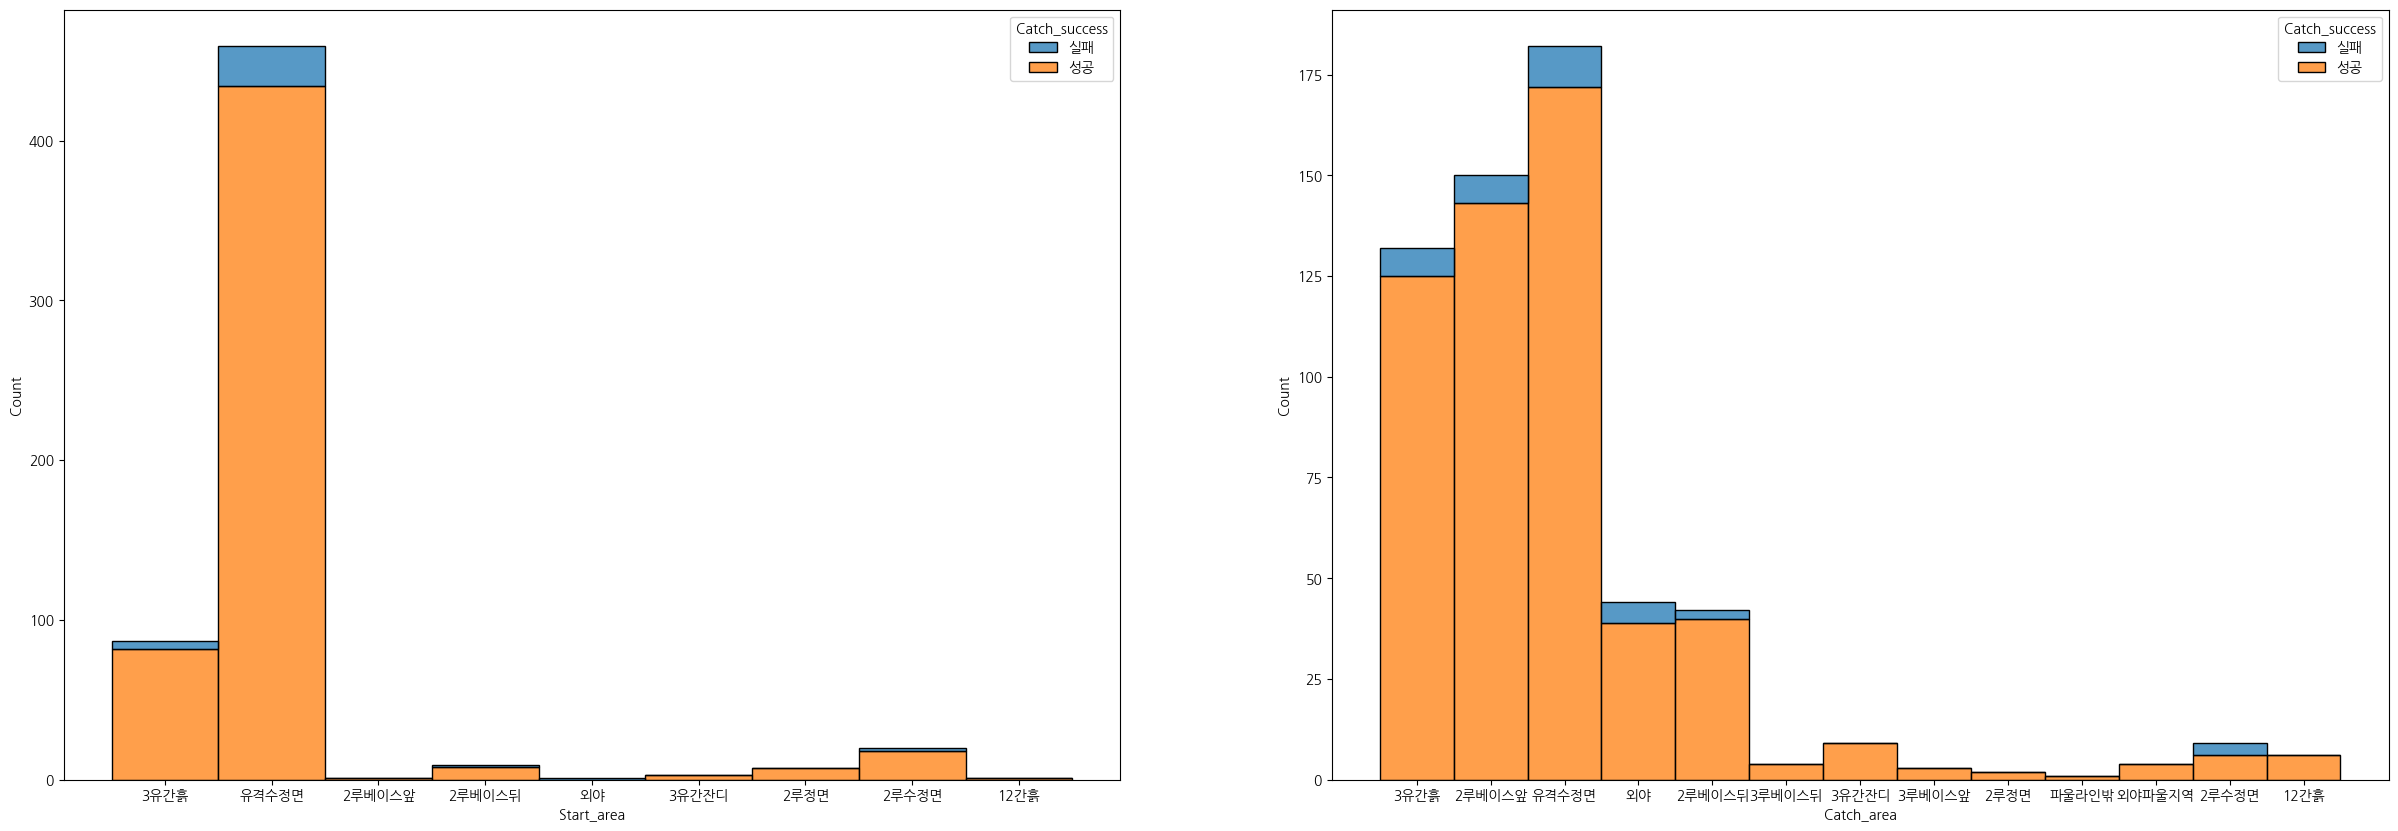

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))

sns.histplot(x=df['Start_area'], hue=df['Catch_success'], multiple='stack', ax=axes[0])
sns.histplot(x=df['Catch_area'], hue=df['Catch_success'], multiple='stack', ax=axes[1])
plt.show()

In [ ]:
df['Start_area'].value_counts(1) * 100

유격수정면     78.061224
3유간흙      14.795918
2루수정면      3.401361
2루베이스뒤     1.530612
2루정면       1.190476
3유간잔디      0.510204
2루베이스앞     0.170068
외야         0.170068
12간흙       0.170068
Name: Start_area, dtype: float64

In [ ]:
df_cf['Start_area'].value_counts(1) * 100

유격수정면     73.529412
3유간흙      14.705882
2루수정면      5.882353
외야         2.941176
2루베이스뒤     2.941176
Name: Start_area, dtype: float64

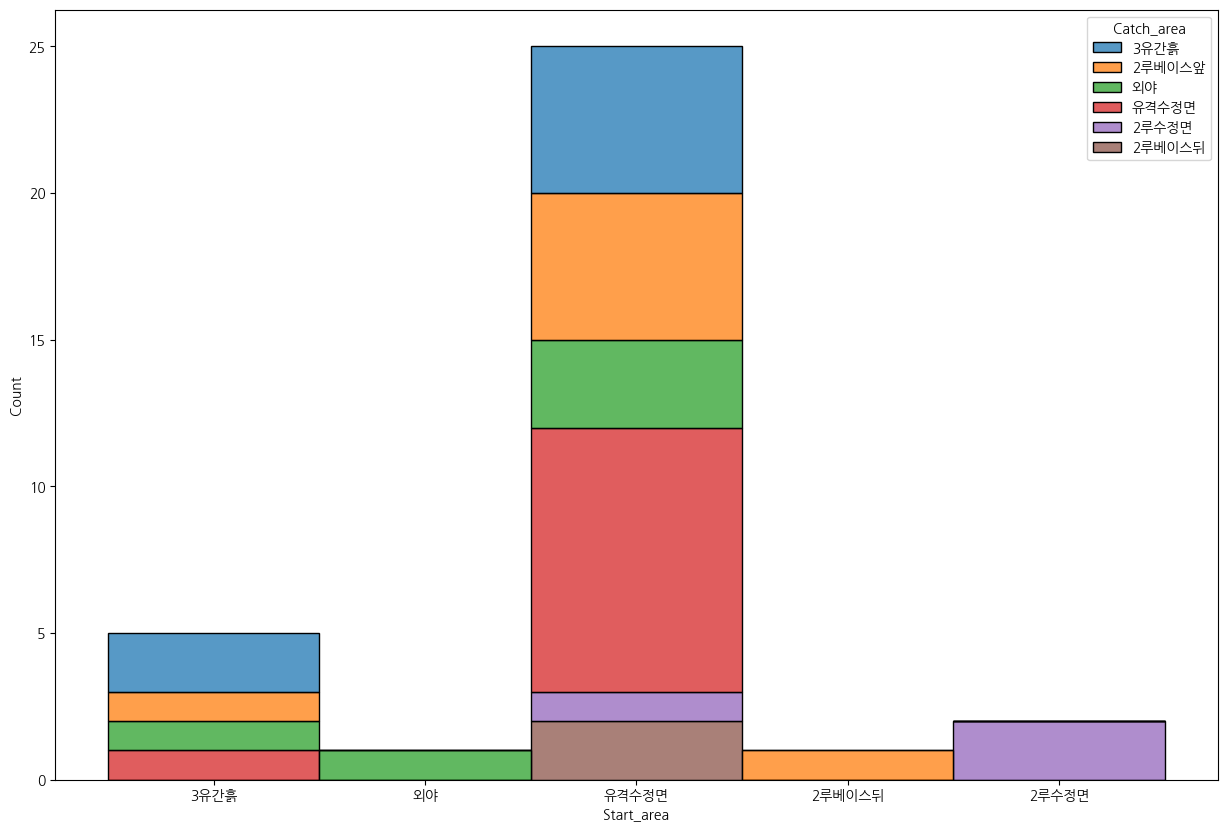

In [ ]:
plt.figure(figsize=(15,10))

sns.histplot(x=df_cf['Start_area'], hue=df_cf['Catch_area'], multiple='stack')
plt.show()

In [ ]:
df_cf[df_cf['Start_area']==df_cf['Catch_area']]

,Position,Date,Team,Inning,Batter,Batter_hand,Bounds,Start_area,Catch_area,Catch_pos,...,Throw_area,Throw_to,Throw_time,Throw_direction,Throw_pos,Catch_success,Throw_success,Situation,Note_1,Note_2
0,유격수,2023.4.1,삼성,3,피렐라,우,2,3유간흙,3유간흙,무릎,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
38,유격수,2023.4.13,KT,8,김상수,우,1,외야,외야,발목,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
52,유격수,2023.4.18,LG,6,문보경,좌,2,유격수정면,유격수정면,발목,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,NaN,NaN
147,유격수,2023.5.19,삼성,7,김현준,좌,1,유격수정면,유격수정면,무릎,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,안타,바운드처리미스,NaN
254,유격수,2023.6.21,LG,4,문보경,좌,4,유격수정면,유격수정면,무릎,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
300,유격수,2023.7.4,키움,5,이정후,좌,0,2루수정면,2루수정면,머리위,...,2루베이스뒤,홈,0.75,왼쪽,가슴,실패,실패,내야안타,강습타구,NaN
303,유격수,2023.7.5,키움,7,이형종,우,3,유격수정면,유격수정면,무릎,...,유격수정면,1루,1.75,정면,얼굴,실패,성공,땅볼,NaN,NaN
337,유격수,2023.7.25,기아,4,김태군,우,2,유격수정면,유격수정면,무릎,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,숏바운드처리미스,NaN
429,유격수,2023.8.26,LG,8,문보경,좌,2,유격수정면,유격수정면,허리,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실책,강습타구,NaN
442,유격수,2023.8.31,기아,6,김선빈,좌,0,유격수정면,유격수정면,허리,...,NaN,NaN,NaN,NaN,NaN,실패,NaN,포구실패,다이빙캐치,NaN


유격수 정면에서 가장 많은 실책이 나왔지만, Start_area데이터의 80퍼센트는 유격수정면이다. 하지만, 실패 데이터는 df와 다른 양상이다. 유격수정면의 비율이 여전히 높긴 하지만, Catch_area에선 다른 위치에서의 실패 비율이 많이 높아졌다. 또한 이 배경엔 Start_area 대부분이 유격수 정면인 점을 보면 다른 위치로 이동할 때 확실히 실패 비율이 높아진 것을 알 수 있다.

### 포구 시 공 위치별

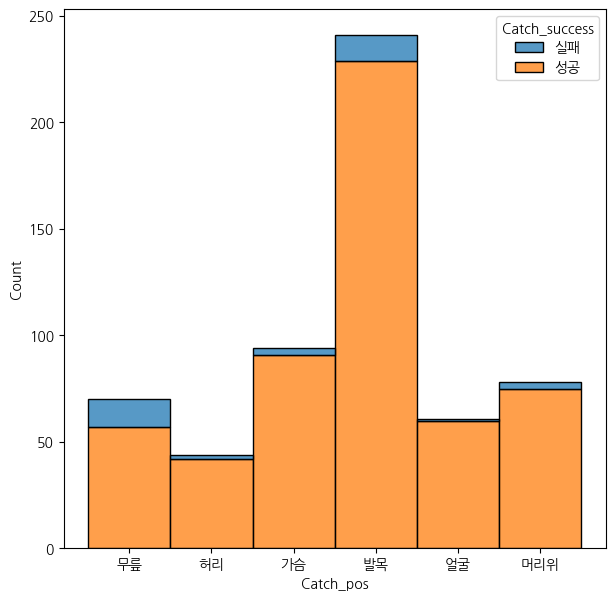

In [ ]:
plt.figure(figsize=(7,7))

sns.histplot(x=df['Catch_pos'], hue=df['Catch_success'], multiple='stack')
plt.show()

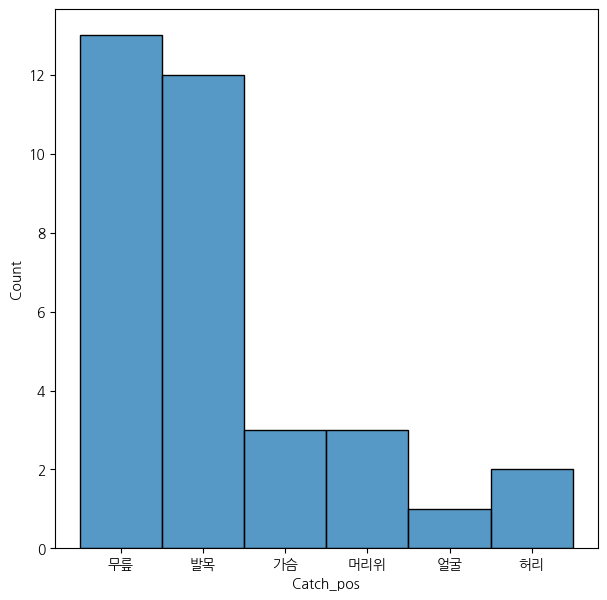

In [ ]:
plt.figure(figsize=(7,7))

sns.histplot(x=df_cf['Catch_pos'], multiple='stack')
plt.show()

In [ ]:
cf_bycatchpos = df_cf['Catch_pos'].value_counts()
cf_bycatchpos

무릎     13
발목     12
가슴      3
머리위     3
허리      2
얼굴      1
Name: Catch_pos, dtype: int64

In [ ]:
df_catchposcount = df['Catch_pos'].value_counts()
catchpos = cf_bycatchpos / df_catchposcount * 100

볼 포지션 자료를 보면 발목과 무릎이 가장 많다. 하지만 무릎은 절대적 수가 적어 실패/총량 비율로 보면 무릎의 실패 비율은 18퍼센트를 기록한다.

In [ ]:
catchpos

가슴      3.191489
머리위     3.846154
무릎     18.571429
발목      4.979253
얼굴      1.639344
허리      4.545455
Name: Catch_pos, dtype: float64

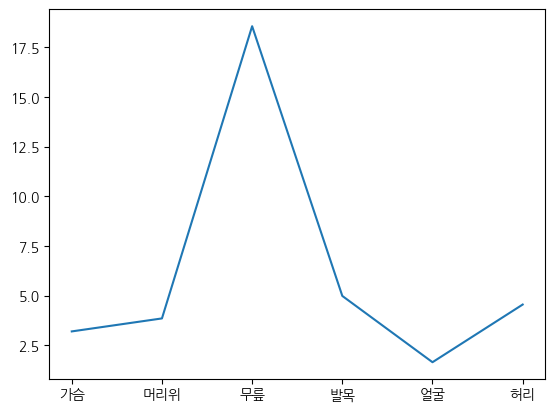

In [ ]:
plt.plot(catchpos)

결국 무릎의 수비를 더 신경 써야 할듯 하다.

### 이닝별

<Axes: xlabel='Inning', ylabel='Density'>

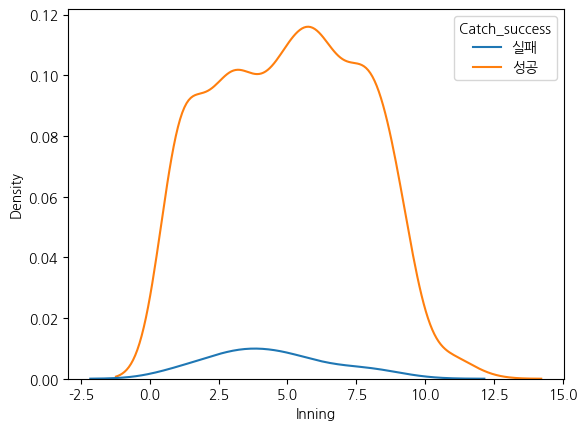

In [ ]:
sns.kdeplot(x=df['Inning'], hue=df['Catch_success'])

이닝별로 보면 경기 후반부보다 오히려 경기 중반부에 더 실책이 많은 점을 알 수 있다. 특히, 3회와 4회에 가장 많다.

## 송구 미스 분석

In [ ]:
df_tf

,Position,Date,Team,Inning,Batter,Batter_hand,Bounds,Start_area,Catch_area,Catch_pos,...,Throw_area,Throw_to,Throw_time,Throw_direction,Throw_pos,Catch_success,Throw_success,Situation,Note_1,Note_2
26,유격수,2023.4.8,키움,7,김준완,좌,4,유격수정면,3유간흙,발목,...,3유간흙,1루,0.55,오른쪽,허리,성공,실패,내야안타,숏바운드송구실패,NaN
71,유격수,2023.4.21,롯데,4,안권수,좌,1,유격수정면,유격수정면,허리,...,유격수정면,1루,0.96,오른쪽,허리,성공,실패,송구실책,숏바운드송구미스,NaN
82,유격수,2023.4.23,롯데,9,전준우,우,20,유격수정면,3유간흙,발목,...,3유간잔디,1루,0.64,오른쪽,발목,성공,실패,송구실책,숏바운드송구미스,NaN
175,유격수,2023.5.25,롯데,5,정보근,우,0,유격수정면,2루수정면,무릎,...,12간흙,홈,0.50,왼쪽,머리위,실패,실패,포구실책,송구미스추가,NaN
179,유격수,2023.5.25,롯데,3,안치홍,우,3,유격수정면,외야,발목,...,외야,1루,1.65,왼쪽,무릎,성공,실패,내야안타,다이빙캐치,NaN
185,유격수,2023.5.27,한화,3,이진영,우,3,유격수정면,3유간흙,발목,...,3유간흙,1루,1.18,오른쪽,머리위,성공,실패,송구실책,높은송구,NaN
186,유격수,2023.5.27,한화,5,이진영,우,0,3유간흙,3루베이스앞,허리,...,3루베이스앞,1루,0.50,오른쪽,발목,성공,실패,송구실책,먼송구,NaN
196,유격수,2023.5.31,두산,3,정수빈,좌,2,유격수정면,3유간흙,가슴,...,3유간흙,1루,0.53,왼쪽,머리위,성공,실패,송구실책,높은송구,NaN
237,유격수,2023.6.14,두산,2,박계범,우,4,유격수정면,유격수정면,발목,...,유격수정면,1루,1.26,왼쪽,머리위,성공,실패,땅볼,높은송구,NaN
240,2루수,2023.6.15,두산,8,강승호,우,0,2루수정면,2루베이스앞,가슴,...,2루베이스앞,1루,0.56,왼쪽,머리위,성공,실패,병살타,높은송구,NaN


### 상대팀별

<Axes: xlabel='Team', ylabel='count'>

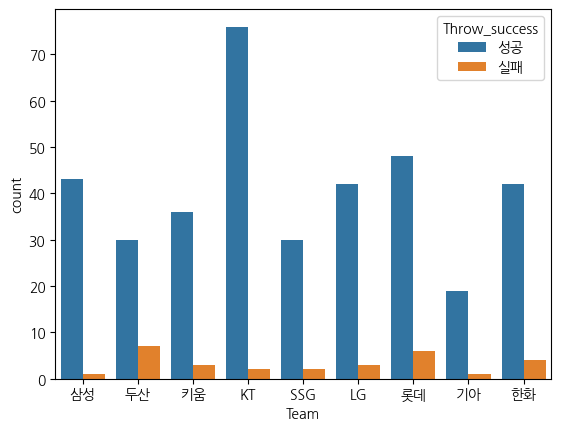

In [ ]:
sns.countplot(x=df['Team'], hue=df['Throw_success'])

In [ ]:
tf_byteam = df_tf.groupby(["Team"])["Throw_success"].count()
tf_byteam

Team
KT     2
LG     3
SSG    2
기아     1
두산     7
롯데     6
삼성     1
키움     3
한화     4
Name: Throw_success, dtype: int64

두산과 롯데상대 최다

In [ ]:
df_throwcount = df.groupby(["Team"])["Throw_success"].count()
tf_byteam / df_throwcount * 100

Team
KT      2.564103
LG      6.666667
SSG     6.250000
기아      5.000000
두산     18.918919
롯데     11.111111
삼성      2.272727
키움      7.692308
한화      8.695652
Name: Throw_success, dtype: float64

상대 비율에서 압도적인 두산 상대 송구 실책

In [ ]:
df[df['Team']=='두산'].shape

(58, 21)

In [ ]:
df_tf[df_tf['Team']=='두산']

,Position,Date,Team,Inning,Batter,Batter_hand,Bounds,Start_area,Catch_area,Catch_pos,...,Throw_area,Throw_to,Throw_time,Throw_direction,Throw_pos,Catch_success,Throw_success,Situation,Note_1,Note_2
196,유격수,2023.5.31,두산,3,정수빈,좌,2,유격수정면,3유간흙,가슴,...,3유간흙,1루,0.53,왼쪽,머리위,성공,실패,송구실책,높은송구,NaN
237,유격수,2023.6.14,두산,2,박계범,우,4,유격수정면,유격수정면,발목,...,유격수정면,1루,1.26,왼쪽,머리위,성공,실패,땅볼,높은송구,NaN
240,2루수,2023.6.15,두산,8,강승호,우,0,2루수정면,2루베이스앞,가슴,...,2루베이스앞,1루,0.56,왼쪽,머리위,성공,실패,병살타,높은송구,NaN
418,유격수,2023.8.20,두산,2,박준영,우,3,3유간흙,유격수정면,발목,...,유격수정면,홈,1.02,정면,머리위,성공,실패,송구실책,높은송구,숏바운드처리
420,유격수,2023.8.20,두산,6,박준영,우,1,유격수정면,유격수정면,허리,...,외야,1루,1.25,오른쪽,머리위,성공,실패,내야안타,높은송구,터닝스로
527,유격수,2023.10.12,두산,5,김재호,우,3,유격수정면,3유간흙,발목,...,3유간흙,1루,0.85,왼쪽,얼굴,성공,실패,땅볼,먼송구,러닝스로
549,유격수,2023.10.19,두산,1,김재호,우,3,유격수정면,외야,무릎,...,외야,1루,1.48,왼쪽,발목,성공,실패,내야안타,먼송구,다이빙캐치


In [ ]:
df_tf[df_tf['Team']=='롯데']

,Position,Date,Team,Inning,Batter,Batter_hand,Bounds,Start_area,Catch_area,Catch_pos,...,Throw_area,Throw_to,Throw_time,Throw_direction,Throw_pos,Catch_success,Throw_success,Situation,Note_1,Note_2
71,유격수,2023.4.21,롯데,4,안권수,좌,1,유격수정면,유격수정면,허리,...,유격수정면,1루,0.96,오른쪽,허리,성공,실패,송구실책,숏바운드송구미스,NaN
82,유격수,2023.4.23,롯데,9,전준우,우,20,유격수정면,3유간흙,발목,...,3유간잔디,1루,0.64,오른쪽,발목,성공,실패,송구실책,숏바운드송구미스,NaN
175,유격수,2023.5.25,롯데,5,정보근,우,0,유격수정면,2루수정면,무릎,...,12간흙,홈,0.50,왼쪽,머리위,실패,실패,포구실책,송구미스추가,NaN
179,유격수,2023.5.25,롯데,3,안치홍,우,3,유격수정면,외야,발목,...,외야,1루,1.65,왼쪽,무릎,성공,실패,내야안타,다이빙캐치,NaN
319,유격수,2023.7.12,롯데,1,안치홍,우,2,유격수정면,3유간잔디,발목,...,3유간잔디,1루,0.51,오른쪽,무릎,성공,실패,송구실책,먼송구,러닝스로
360,유격수,2023.8.2,롯데,4,노진혁,좌,0,유격수정면,2루베이스앞,얼굴,...,2루베이스앞,1루,0.55,왼쪽,얼굴,성공,실패,땅볼,먼송구,NaN


### 먼송구

In [ ]:
df_tf[df_tf['Note_1']=='먼송구']

,Position,Date,Team,Inning,Batter,Batter_hand,Bounds,Start_area,Catch_area,Catch_pos,...,Throw_area,Throw_to,Throw_time,Throw_direction,Throw_pos,Catch_success,Throw_success,Situation,Note_1,Note_2
186,유격수,2023.5.27,한화,5,이진영,우,0,3유간흙,3루베이스앞,허리,...,3루베이스앞,1루,0.50,오른쪽,발목,성공,실패,송구실책,먼송구,NaN
266,유격수,2023.6.23,한화,3,김인환,좌,1,유격수정면,외야,허리,...,외야,홈,0.56,오른쪽,가슴,성공,실패,송구실책,먼송구,NaN
271,유격수,2023.6.24,한화,1,채은성,우,2,유격수정면,3루베이스뒤,가슴,...,3루베이스뒤,3루,0.64,왼쪽,허리,성공,실패,송구실책,먼송구,급한판단
319,유격수,2023.7.12,롯데,1,안치홍,우,2,유격수정면,3유간잔디,발목,...,3유간잔디,1루,0.51,오른쪽,무릎,성공,실패,송구실책,먼송구,러닝스로
340,유격수,2023.7.26,기아,2,소크라테스,좌,0,유격수정면,2루베이스앞,얼굴,...,2루베이스앞,1루,0.61,오른쪽,가슴,성공,실패,송구실책,먼송구,NaN
350,유격수,2023.7.29,KT,8,김민혁,좌,8,유격수정면,3유간흙,발목,...,3유간흙,1루,1.07,오른쪽,가슴,성공,실패,내야안타,먼송구,NaN
360,유격수,2023.8.2,롯데,4,노진혁,좌,0,유격수정면,2루베이스앞,얼굴,...,2루베이스앞,1루,0.55,왼쪽,얼굴,성공,실패,땅볼,먼송구,NaN
426,2루수,2023.8.25,LG,9,최승민,좌,2,2루수정면,2루베이스뒤,허리,...,2루베이스뒤,1루,0.57,오른쪽,얼굴,성공,실패,송구실책,먼송구,언더스로
453,유격수,2023.9.3,삼성,1,김현준,좌,20,유격수정면,3유간흙,발목,...,3유간흙,1루,0.52,오른쪽,발목,성공,실패,송구실책,먼송구,NaN
520,유격수,2023.9.22,LG,6,문성주,좌,3,유격수정면,3유간흙,발목,...,3유간잔디,1루,0.80,왼쪽,허리,성공,실패,내야안타,먼송구,러닝스로


송구실패 전체 사례 29건 중 20개.

<Axes: xlabel='Note_1', ylabel='count'>

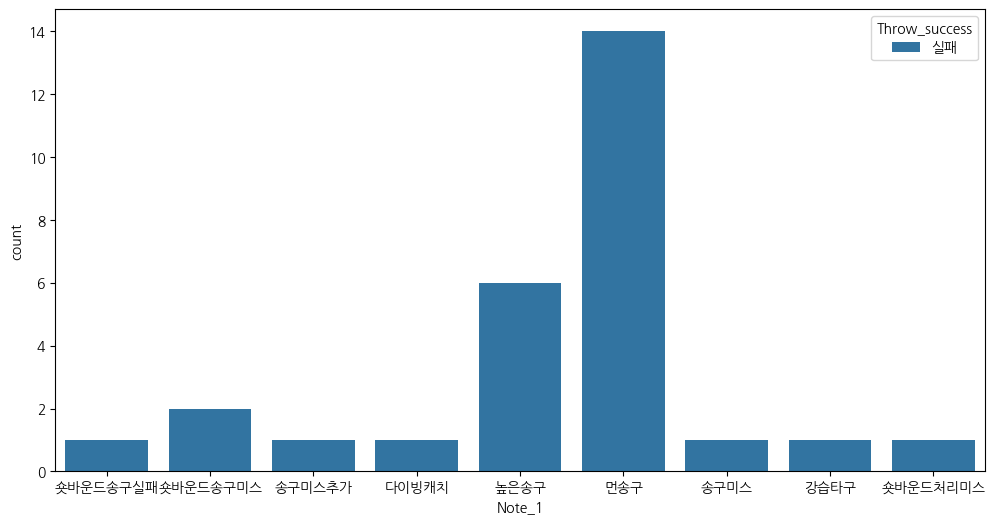

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=(df_tf['Note_1']), hue=df_tf['Throw_success'])

<Axes: xlabel='Note_1', ylabel='count'>

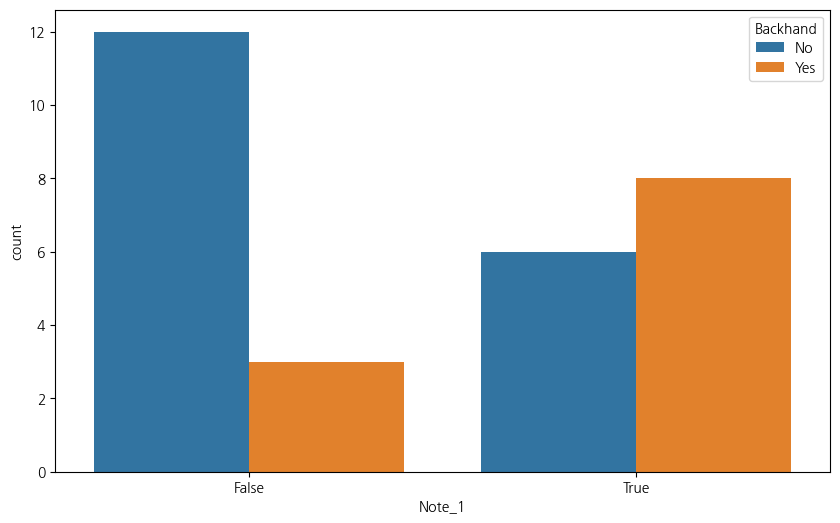

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=(df_tf['Note_1']=='먼송구'), hue=df_tf['Backhand'])

<Axes: xlabel='Note_1', ylabel='count'>

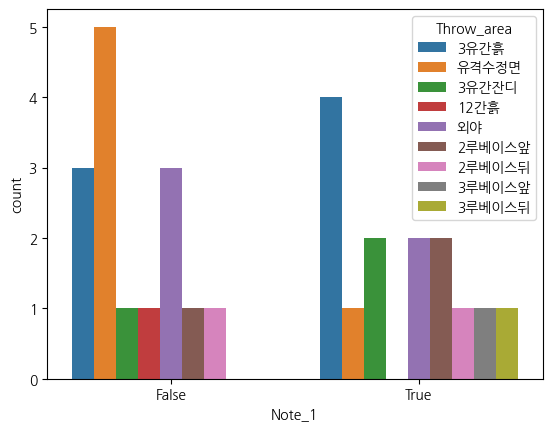

In [ ]:
sns.countplot(x=(df_tf['Note_1']=='먼송구'), hue=df_tf['Throw_area'])

3유간 송구에서 가장 실패가 많이 나온 모습

<Axes: xlabel='Note_1', ylabel='count'>

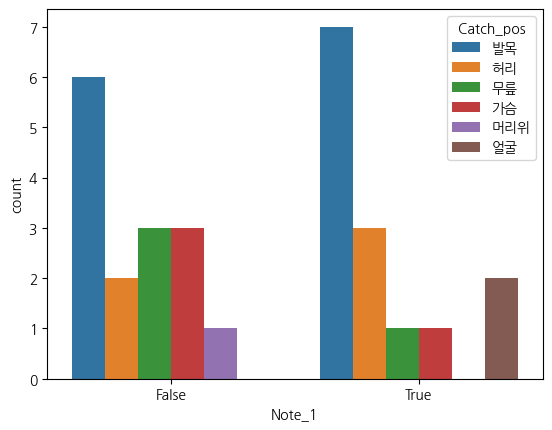

In [ ]:
sns.countplot(x=(df_tf['Note_1']=='먼송구'), hue=df_tf['Catch_pos'])

<Axes: xlabel='Catch_pos', ylabel='count'>

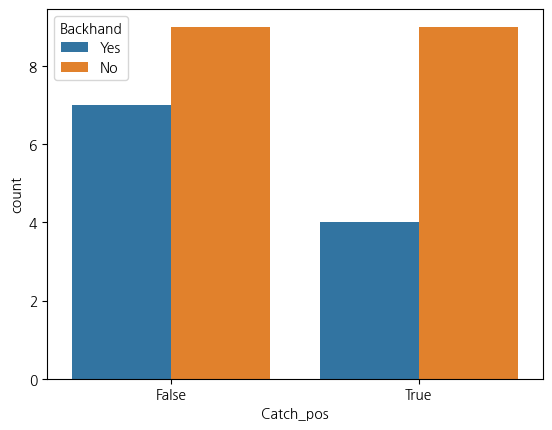

In [ ]:
sns.countplot(x=(df_tf['Catch_pos']=='발목'), hue=df_tf['Backhand'])

<Axes: xlabel='Note_1', ylabel='count'>

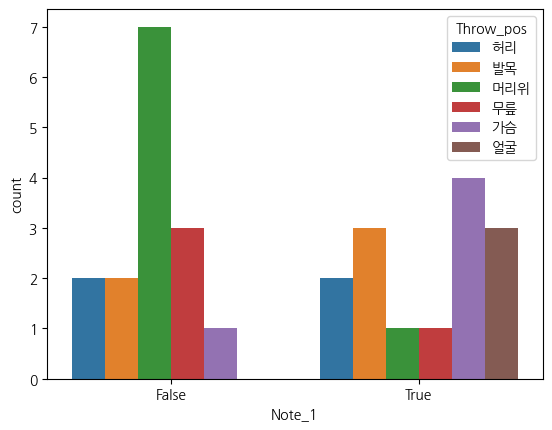

In [ ]:
sns.countplot(x=(df_tf['Note_1']=='먼송구'), hue=df_tf['Throw_pos'])

<Axes: xlabel='Note_1', ylabel='count'>

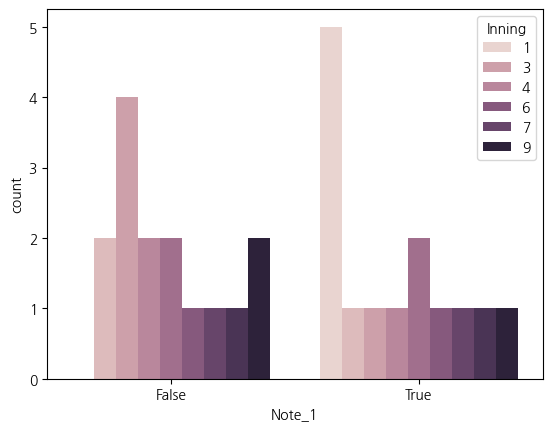

In [ ]:
sns.countplot(x=(df_tf['Note_1']=='먼송구'), hue=df_tf['Inning'])

### 백핸드

<Axes: xlabel='Backhand', ylabel='count'>

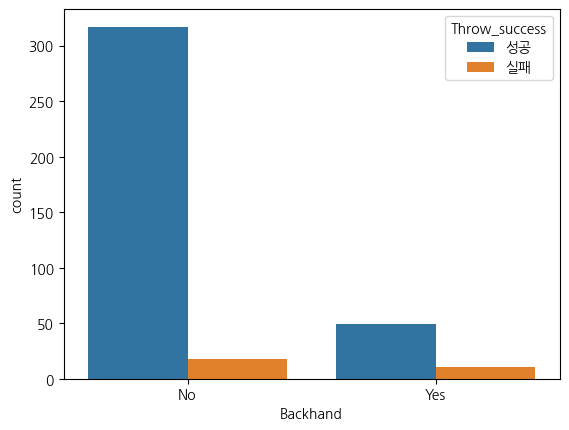

In [ ]:
sns.countplot(x=df['Backhand'], hue=df['Throw_success'])

In [ ]:
df['Backhand'].value_counts(1)

No     0.807823
Yes    0.192177
Name: Backhand, dtype: float64

In [ ]:
df_cf['Backhand'].value_counts(1)

No     0.764706
Yes    0.235294
Name: Backhand, dtype: float64

In [ ]:
df_tf['Backhand'].value_counts(1)

No     0.62069
Yes    0.37931
Name: Backhand, dtype: float64

In [ ]:
df_tf['Backhand'].value_counts() / df['Backhand'].value_counts() * 100

No     3.789474
Yes    9.734513
Name: Backhand, dtype: float64

포구보다 백핸드시 실패확률 2퍼센트 증가

### 수비 위치별

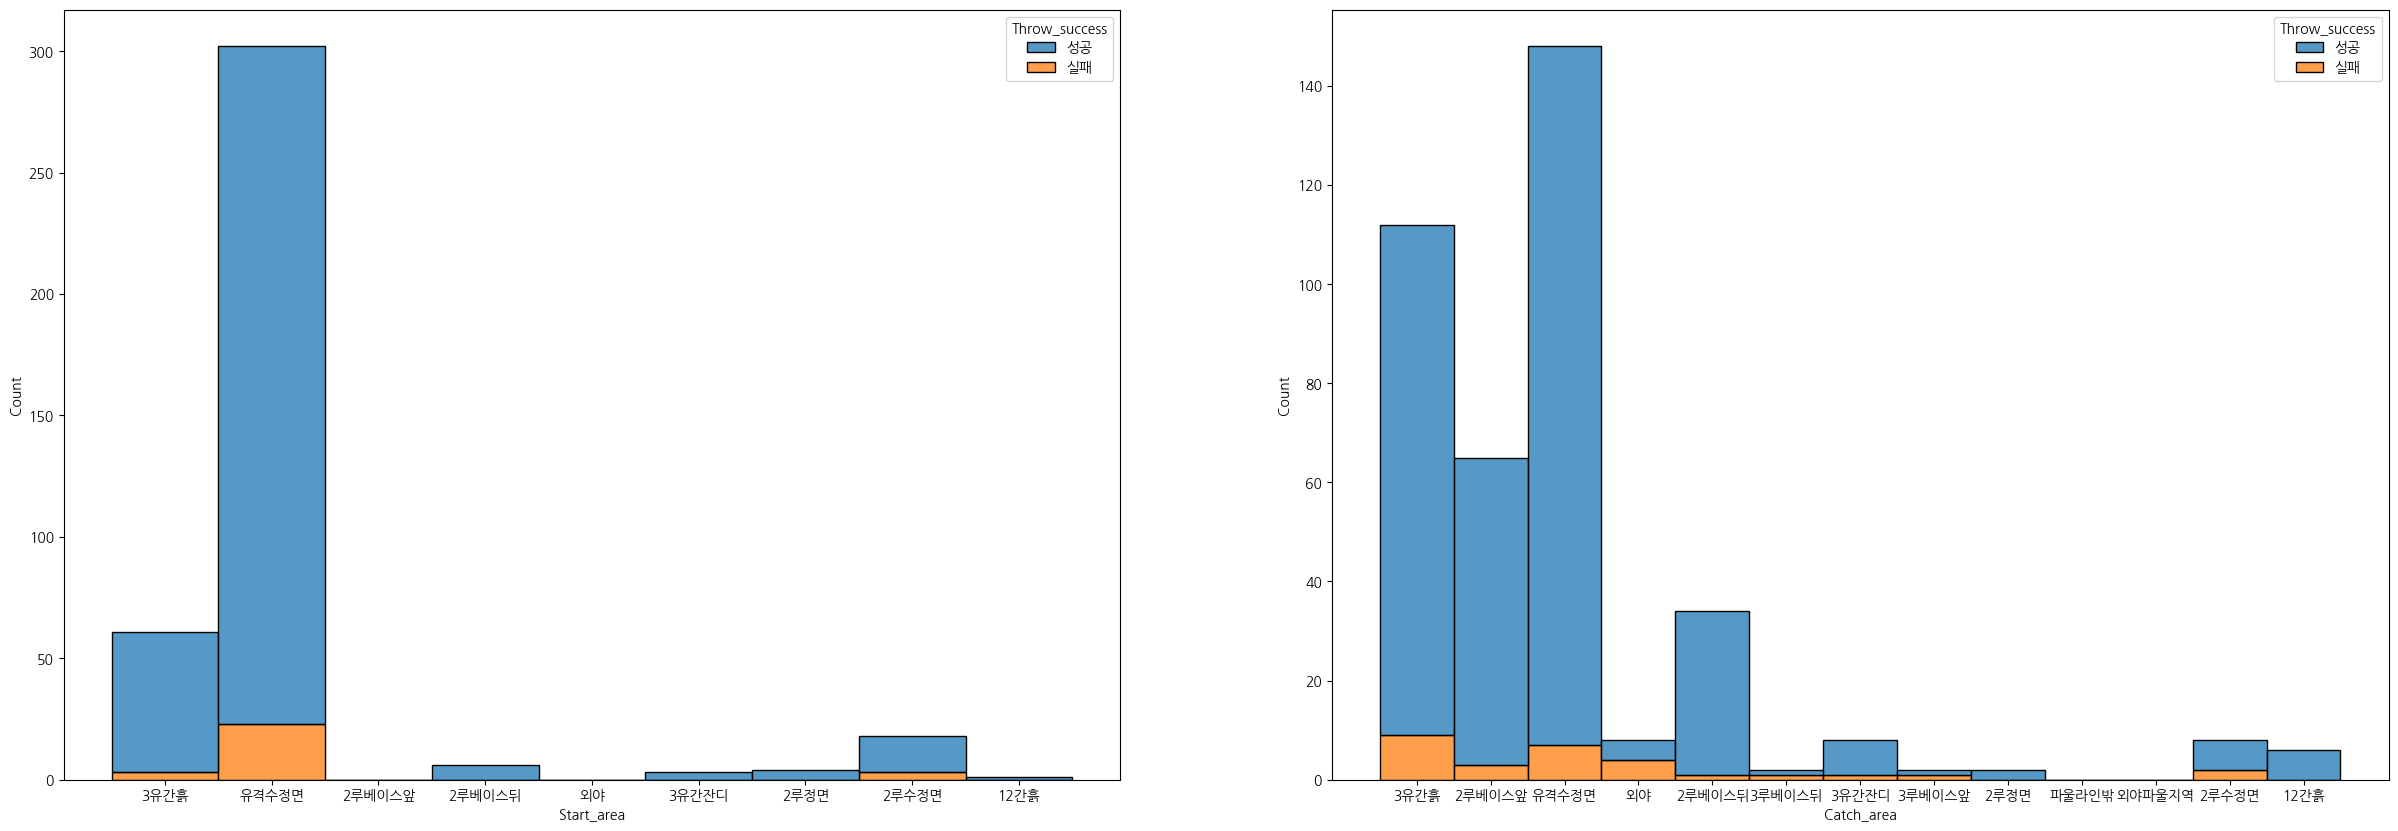

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))

sns.histplot(x=df['Start_area'], hue=df['Throw_success'], multiple='stack', ax=axes[0])
sns.histplot(x=df['Catch_area'], hue=df['Throw_success'], multiple='stack', ax=axes[1])
plt.show()

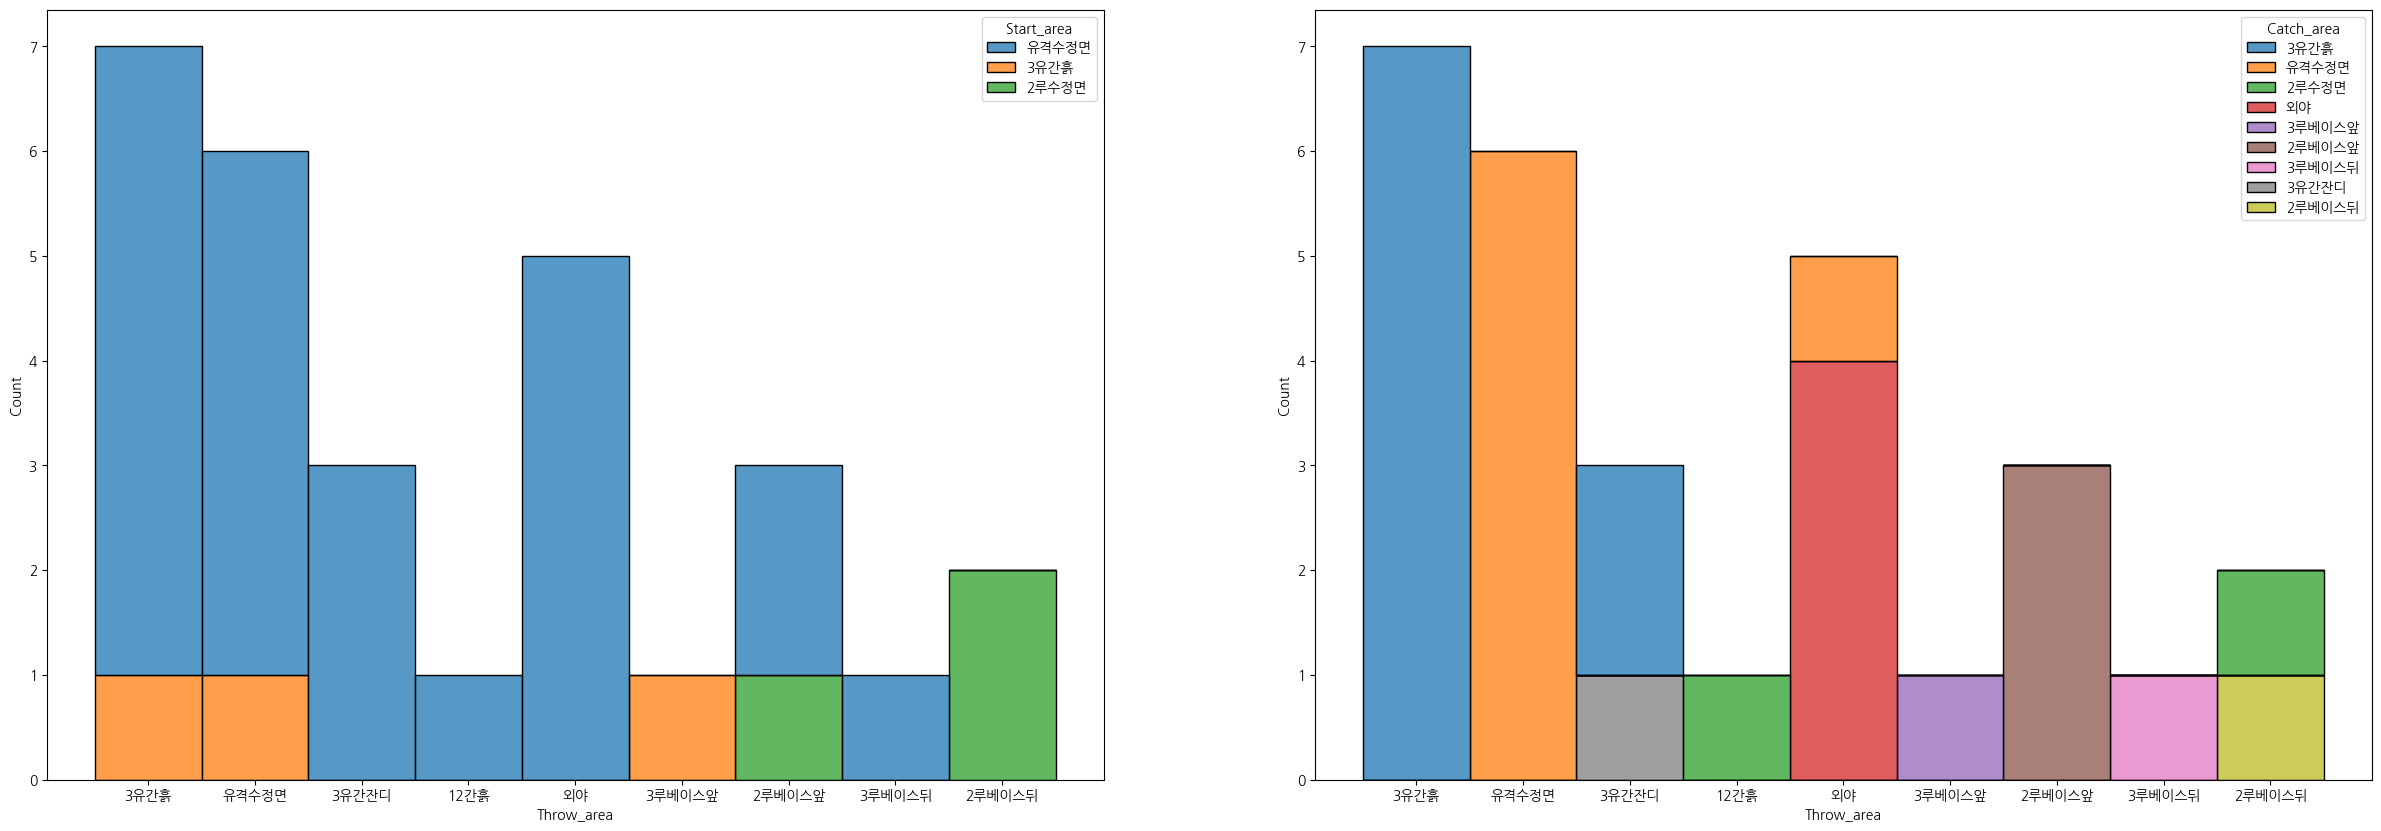

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))

sns.histplot(x=df_tf['Throw_area'], hue=df_tf['Start_area'], multiple='stack', ax=axes[0])
sns.histplot(x=df_tf['Throw_area'], hue=df_tf['Catch_area'], multiple='stack', ax=axes[1])
plt.show()

포구와 비슷함

### 포구 시 공 위치

In [ ]:
df_tf['Throw_to'].value_counts()

1루    23
홈      4
2루     1
3루     1
Name: Throw_to, dtype: int64

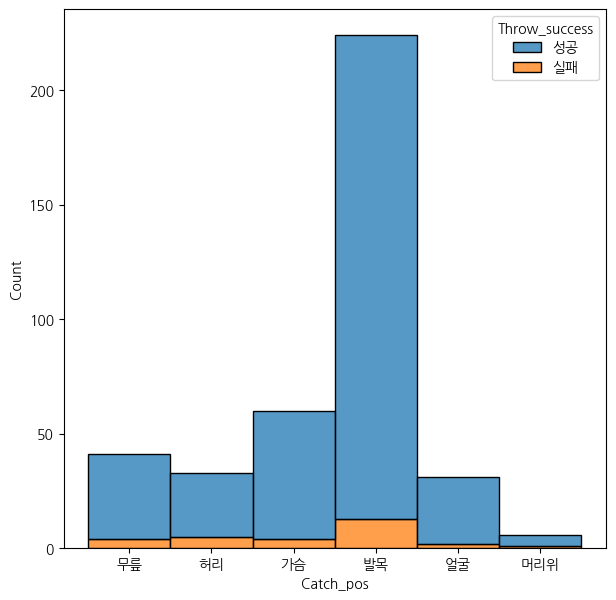

In [ ]:
plt.figure(figsize=(7,7))

sns.histplot(x=df['Catch_pos'], hue=df['Throw_success'], multiple='stack')
plt.show()

수비수의 포구 시 공 위치

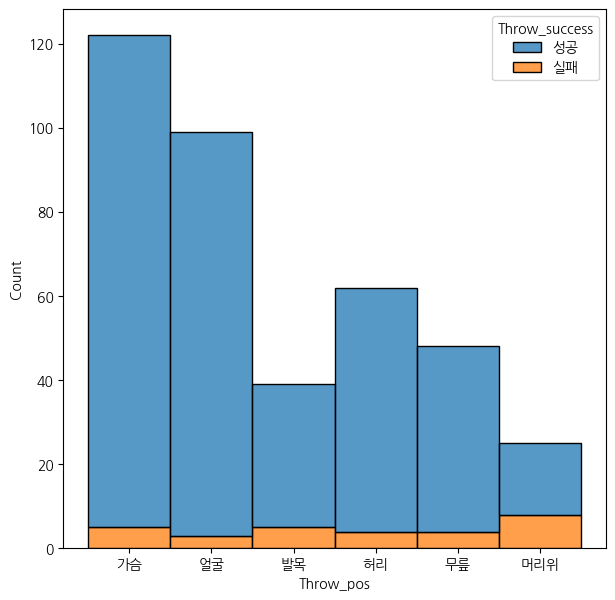

In [ ]:
plt.figure(figsize=(7,7))

sns.histplot(x=df['Throw_pos'], hue=df['Throw_success'], multiple='stack')
plt.show()

In [ ]:
tf_bythrowpos = df_tf['Throw_pos'].value_counts()
tf_bythrowpos

머리위    8
발목     5
가슴     5
허리     4
무릎     4
얼굴     3
Name: Throw_pos, dtype: int64

In [ ]:
df_bythrowpos = df['Throw_pos'].value_counts()
Throwpos = tf_bythrowpos / df_bythrowpos * 100
Throwpos

가슴      4.098361
머리위    32.000000
무릎      8.333333
발목     12.820513
얼굴      3.030303
허리      6.451613
Name: Throw_pos, dtype: float64

가슴과 얼굴 높이는 이상적, 허리 이하로 내려갈때부터 실패확률 증가. 머리위는 3분의 1은 실패

<Axes: xlabel='Throw_pos', ylabel='count'>

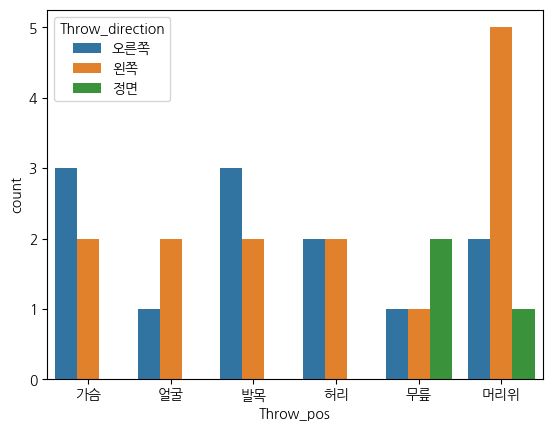

In [ ]:
sns.countplot(x=df['Throw_pos'], hue=df_tf['Throw_direction'])

### 이닝별

<Axes: xlabel='Inning', ylabel='Density'>

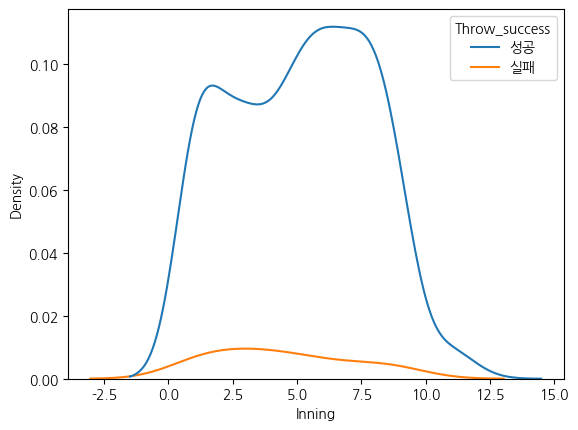

In [ ]:
sns.kdeplot(x=df['Inning'], hue=df['Throw_success'])

포구와 비슷하게 3,4회쯤 최고치

###송구시간

In [ ]:
df['Throw_time'].describe()

count    395.000000
mean       0.917139
std        0.382745
min        0.280000
25%        0.595000
50%        0.850000
75%        1.190000
max        3.120000
Name: Throw_time, dtype: float64

In [ ]:
df_tf['Throw_time'].describe()

count    29.000000
mean      0.821379
std       0.324199
min       0.500000
25%       0.550000
50%       0.750000
75%       1.020000
max       1.650000
Name: Throw_time, dtype: float64

평균보다 빠른 시간 내에 던진 실패 사례. 급한 상황일 가능성 많음